# ¿Qué es un Árbol de Decisión?

- Un árbol de decisión es un modelo predictivo que se utiliza tanto para tareas de clasificación como de regresión. 

- En el contexto de clasificación, se utiliza para asignar una etiqueta a una instancia de datos basándose en sus características. 

- Un árbol de decisión se compone de nodos de decisión y nodos hoja. Cada nodo de decisión divide los datos en dos o más subconjuntos basándose en una característica específica y un valor umbral. 

- Los nodos hoja representan las decisiones finales o las categorías.

<img src="dt_diagram.png">

- Ejemplo de árbol de decision entrenado con el dataset "iris"

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Cargar un conjunto de datos (por ejemplo, iris)
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Crear un modelo de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el modelo
clf.fit(X, y)

# Hacer predicciones
predicciones = clf.predict(X)


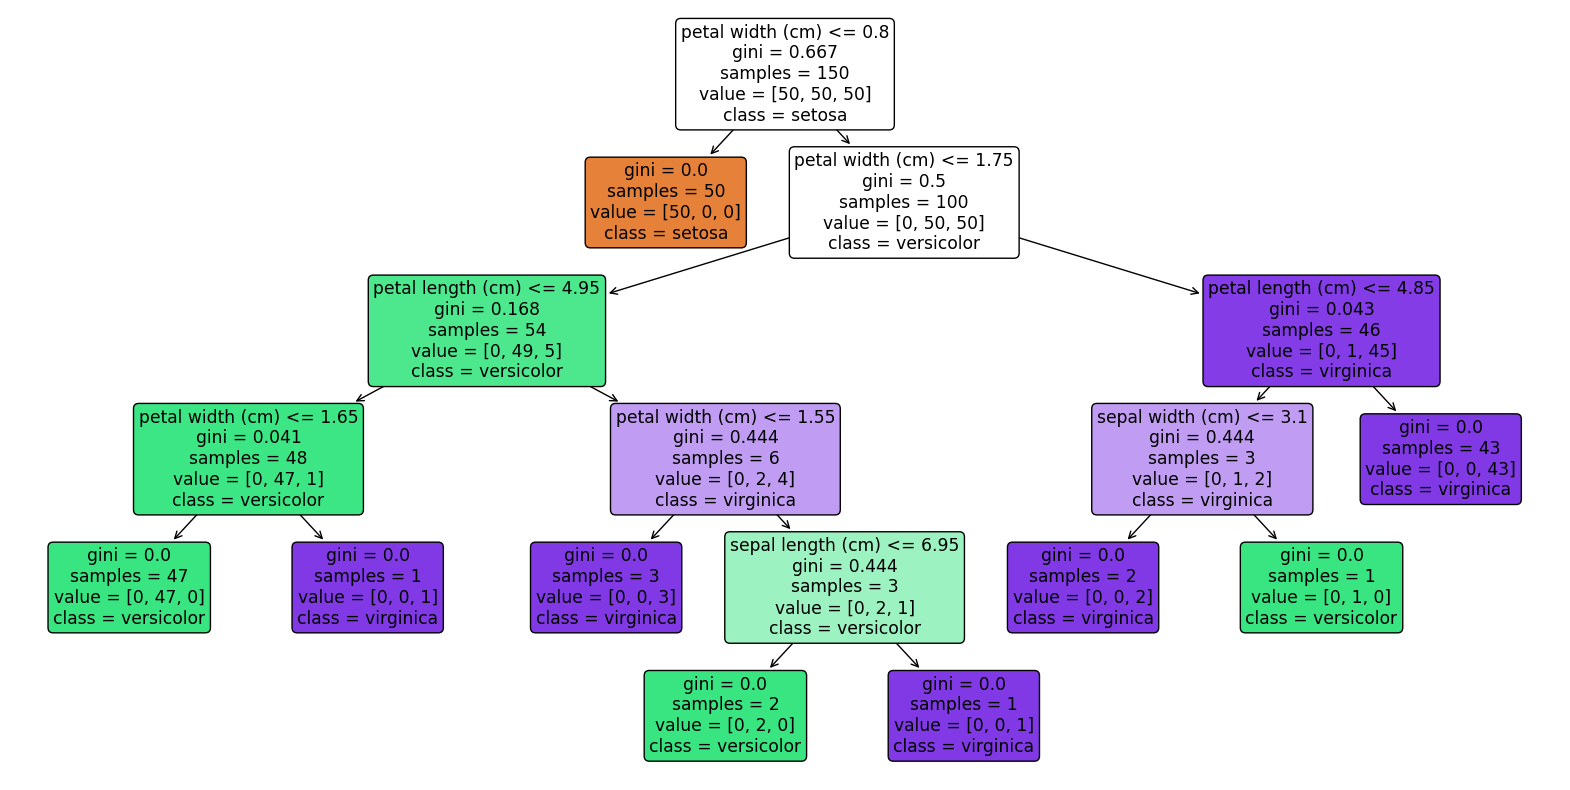

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convertir iris.target_names a lista
class_names = iris.target_names.tolist()

# Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=class_names, rounded=True)
plt.show()

# ¿Cómo se entrena un arbol de decisión? (Algoritmo ID3 - Iterative Dichotomiser 3)

### 1. Se requiere un dataset de entrenamiento

In [14]:
import pandas as pd

# Crear el dataset
data = {
	'Color': ['Rojo', 'Amarillo', 'Rojo', 'Rojo', 'Verde', 'Verde', 'Amarillo', 'Rojo', 'Verde', 'Rojo'],
	'Diametro': [3, 4, 3, 3.5, 3.2, 2.8, 4.2, 3.3, 3.1, 3.4],
	'Fruta': ['Manzana', 'Limón', 'Uva', 'Manzana', 'Uva', 'Limón', 'Limón', 'Manzana', 'Uva', 'Manzana']
}

# Convertir a DataFrame
df = pd.DataFrame(data)
df

,Color,Diametro,Fruta
0,Rojo,3.0,Manzana
1,Amarillo,4.0,Limón
2,Rojo,3.0,Uva
3,Rojo,3.5,Manzana
4,Verde,3.2,Uva
5,Verde,2.8,Limón
6,Amarillo,4.2,Limón
7,Rojo,3.3,Manzana
8,Verde,3.1,Uva
9,Rojo,3.4,Manzana


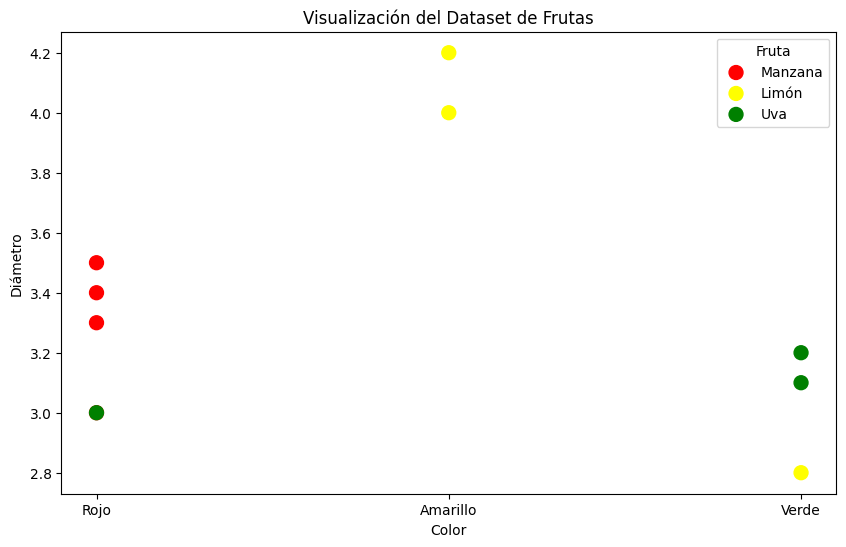

In [15]:
# Asignar valores numéricos a los colores
color_map = {'Rojo': 1, 'Amarillo': 2, 'Verde': 3}
df['Color_Numerico'] = df['Color'].map(color_map)

# Asignar un color a cada tipo de fruta para la visualización
fruta_color_map = {'Manzana': 'red', 'Limón': 'yellow', 'Uva': 'green'}
df['Color_Fruta'] = df['Fruta'].map(fruta_color_map)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Graficar los puntos
for fruta in df['Fruta'].unique():
	subset = df[df['Fruta'] == fruta]
	plt.scatter(subset['Color_Numerico'], subset['Diametro'], 
				color=subset['Color_Fruta'], label=fruta, s=100)

# Añadir etiquetas y título
plt.xlabel('Color')
plt.ylabel('Diámetro')
plt.title('Visualización del Dataset de Frutas')
plt.xticks([1, 2, 3], ['Rojo', 'Amarillo', 'Verde'])
plt.legend(title='Fruta')

# Mostrar el gráfico
plt.show()

## 2. Calcular la "impureza" inicial de nuestro dataset con el coeficiente de Gini

- Coeficiente de Gini del nodo inicial

El coeficiente de Gini es una métrica utilizada para evaluar la "impureza" de un nodo en un árbol de decisión. Se calcula de la siguiente manera:



<img src="gini.png">

In [17]:
# Paso 1: Calcular la proporción de cada clase en el nodo raíz
total_frutas = len(df)
proporciones_clases = df['Fruta'].value_counts() / total_frutas

# Paso 2: Calcular el coeficiente de Gini
coeficiente_gini = 1 - sum(proporciones_clases ** 2)

print("Coeficiente de Gini inicial del dataset:", coeficiente_gini)


Coeficiente de Gini inicial del dataset: 0.66


### 3. Generar un criterio de decisión y calcular los coeficientes de Gini

Ejemplo de criterio de decision: "Color = Rojo"

In [28]:
# Paso 1: Separar los datos en dos grupos
grupo_rojo = df[df['Color'] == 'Rojo']
grupo_no_rojo = df[df['Color'] != 'Rojo']

# Paso 2: Calcular el coeficiente de Gini para cada grupo
def calcular_gini(grupo):
	total = len(grupo)
	proporciones = grupo['Fruta'].value_counts() / total
	gini = 1 - sum(proporciones ** 2)
	return gini

gini_rojo = calcular_gini(grupo_rojo)
gini_no_rojo = calcular_gini(grupo_no_rojo)

print("Coeficiente de Gini para el grupo 'Rojo':", gini_rojo)
print("Coeficiente de Gini para el grupo 'no Rojo':", gini_no_rojo)

Coeficiente de Gini para el grupo 'Rojo': 0.31999999999999984
Coeficiente de Gini para el grupo 'Rojo': 0.48


In [29]:
grupo_rojo

,Color,Diametro,Fruta,Color_Numerico,Color_Fruta
0,Rojo,3.0,Manzana,1,red
2,Rojo,3.0,Uva,1,green
3,Rojo,3.5,Manzana,1,red
7,Rojo,3.3,Manzana,1,red
9,Rojo,3.4,Manzana,1,red


In [30]:
grupo_no_rojo

,Color,Diametro,Fruta,Color_Numerico,Color_Fruta
1,Amarillo,4.0,Limón,2,yellow
4,Verde,3.2,Uva,3,green
5,Verde,2.8,Limón,3,yellow
6,Amarillo,4.2,Limón,2,yellow
8,Verde,3.1,Uva,3,green


## 4. Calcular la ganancia de información

La fórmula para calcular la ganancia de información a partir de los coeficientes de Gini es la siguiente:

<img src="ganancia.png">

In [31]:
# Calcular la impureza inicial (coeficiente de Gini del nodo raíz)
impureza_inicial = coeficiente_gini

# Calcular la impureza de cada grupo después de la división
n1 = len(grupo_rojo)
n2 = len(grupo_no_rojo)
impureza_grupo_rojo = gini_rojo
impureza_grupo_no_rojo = gini_no_rojo

# Calcular la ganancia de información
ganancia_informacion = impureza_inicial - ((n1 / total_frutas) * impureza_grupo_rojo + (n2 / total_frutas) * impureza_grupo_no_rojo)

print("Impureza inicial (Coeficiente de Gini del nodo raíz):", impureza_inicial)
print("Impureza del grupo 'Rojo':", impureza_grupo_rojo)
print("Impureza del grupo 'No Rojo':", impureza_grupo_no_rojo)
print("Ganancia de información:", ganancia_informacion)


Impureza inicial (Coeficiente de Gini del nodo raíz): 0.66
Impureza del grupo 'Rojo': 0.31999999999999984
Impureza del grupo 'No Rojo': 0.48
Ganancia de información: 0.2600000000000001


### 5. Probar varios criterios de decisión y guardar el criterio que maximiza la ganancia de información

In [34]:
# Definir una función para calcular la ganancia de información dado un criterio de división
def calcular_ganancia_informacion(coeficiente_gini_padre, coeficientes_gini_hijos, tamaños_hijos):
	ganancia_informacion = coeficiente_gini_padre
	for i in range(len(coeficientes_gini_hijos)):
		ganancia_informacion -= (tamaños_hijos[i] / sum(tamaños_hijos)) * coeficientes_gini_hijos[i]
	return ganancia_informacion

# Lista de criterios de división binarios (características y valores)
criterios_division_binarios = [('Color', 'Rojo'), ('Diametro', 3.5), ('Color','Verde'), ('Diametro', 3.2)]

# Calcular la ganancia de información para cada criterio de división binario
for criterio, valor in criterios_division_binarios:
	# Dividir los datos según el criterio binario
	grupo1 = df[df[criterio] == valor]
	grupo2 = df[df[criterio] != valor]

	# Calcular coeficientes de Gini para cada grupo
	gini_grupo1 = calcular_gini(grupo1)
	gini_grupo2 = calcular_gini(grupo2)

	# Calcular ganancia de información
	ganancia_info = calcular_ganancia_informacion(coeficiente_gini, [gini_grupo1, gini_grupo2], [len(grupo1), len(grupo2)])
	print(f"Ganancia de información para criterio '{criterio}={valor}': {ganancia_info}")


Ganancia de información para criterio 'Color=Rojo': 0.2600000000000001
Ganancia de información para criterio 'Diametro=3.5': 0.05999999999999994
Ganancia de información para criterio 'Color=Verde': 0.12666666666666676
Ganancia de información para criterio 'Diametro=3.2': 0.08222222222222231


# Entrenar un arbol de decision con Scikit-Learn

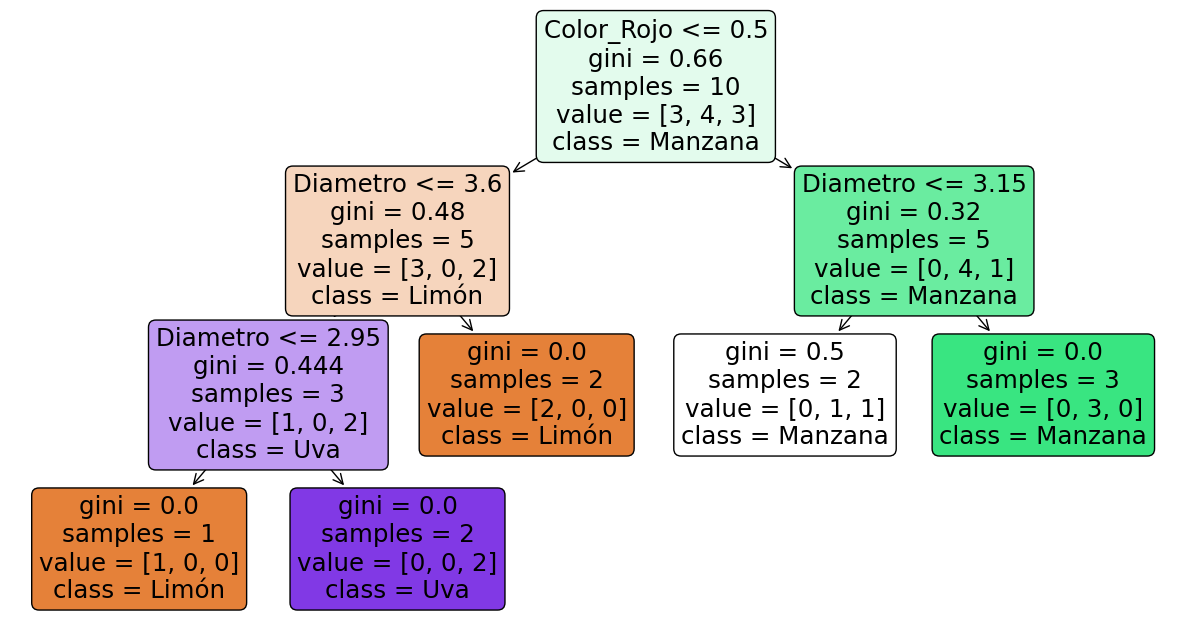

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Codificar las características de color usando one-hot encoding
df_encoded = pd.get_dummies(df[['Color', 'Diametro']])

# Codificar las etiquetas (Fruta) usando Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['Fruta'] = le.fit_transform(df['Fruta'])

# Separar características y etiquetas
X = df_encoded.drop('Fruta', axis=1)
y = df_encoded['Fruta']

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Obtener los nombres de las características como una lista
feature_names = list(X.columns)

# Obtener los nombres de las clases como una lista
class_names = list(le.classes_)

# Visualizar el árbol
plt.figure(figsize=(15, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()


- El algoritmo ID3 sigue separando el dataset de forma recursiva hasta que todos los nodos sean puros o hasta que se supere una profundidad máxima previamente designada.

- El algoritmo ID3 (Iterative Dichotomiser 3) es uno de los algoritmos más antiguos y básicos utilizados para construir árboles de decisión

- ID3 está diseñado para manejar atributos categóricos (también conocidos como nominales) en los datos de entrada. No es compatible directamente con atributos numéricos continuos, que deben ser discretizados previamente.

-  ID3 tiende a sobreajustar los datos de entrenamiento, especialmente cuando se enfrenta a conjuntos de datos grandes o ruidosos. Esto puede conducir a árboles de decisión demasiado complejos que no generalizan bien a datos no vistos.

-  Aunque ID3 fue un punto de partida importante en el desarrollo de algoritmos de árboles de decisión, ha sido mejorado por algoritmos más sofisticados como C4.5 y CART, que abordan algunas de sus limitaciones.

-  ID3 en su forma original no es adecuado para resolver problemas de regresión, donde el objetivo es predecir un valor numérico continuo en lugar de una clase discreta. Esto se debe a que ID3 utiliza medidas de impureza (como la entropía o el coeficiente de Gini) para seleccionar las características que mejor dividen los datos en clases, lo cual es apropiado para problemas de clasificación pero no para regresión.

-  C4.5 y CART pueden manejar tanto problemas de clasificación como de regresión

- El algoritmo utilizado por el clasificador DecisionTreeClassifier de scikit-learn depende de los parámetros que especifiques al crear la instancia del clasificador. Por defecto, DecisionTreeClassifier utiliza el algoritmo CART (Classification and Regression Trees), que es una variante del algoritmo ID3.  

### Implementación en Scikit-Learn

El módulo tree de scikit-learn tiene implementaciones de árboles de decisión para problemas de clasificación y regresión. Nos enfocaremos en la primera.

Los principales argumentos de DecisionTreeClassifier son:

	- criterion: El criterio que se utiliza para escoger los splits, las opciones son 'gini' y 'entropy'

	- max_depth: Límite para la profundidad máxima del árbol

	- min_samples_split: El número mínimo de ejemplos en un nodo para realizar un split

	- min_samples_leaf: El número mínimo de ejemplos que pueden estar en un nodo hoja

	- min_impurity_decrease: La disminución de pureza mínima en un nodo para realizar un split

	- class_weight: Permite asignar ponderación a las clases, es de utilidad si se tienen clases medianamente desbalanceadas

	- max_features: El número máximo de atributos a considerar en cada split